## Задание к итоговой работе по курсу "Python для анализа данных"

### Задание

Дан файл `HR.csv` с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. `satisfaction_level` - Уровень удовлетворенности работой
2. `Last_evaluation` - Время с момента последней оценки в годах
3. `number_projects` - Количество проектов, выполненных за время работы
4. `average_monthly_hours` - Среднее количество часов на рабочем месте в месяц
5. `time_spend_company` - Стаж работы в компании в годах
6. `work_accident` - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. `left` - уволился ли сотрудник
8. `promotion_last_5years` - повышался ли сотрудник за последние пять лет
9. `department` - отдел в котором работает сотрудник
10. `salary` - относительный уровень зарплаты

#### Требуется выполнить следующее задание:

| # | Задание | Баллы |
| --- | :--- | :---: |
| <a href='#task1'>1</a> | Загрузите файл HR.csv в pandas dataframe | 5 |
| <a href='#task2'>2</a> | Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). | 10 |
| <a href='#task3'>3</a> | Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.<br>Определите две самые скоррелированные и две наименее скоррелированные переменные. | 10 | 
| <a href='#task4'>4</a> | Рассчитайте сколько сотрудников работает в каждом департаменте. | 5 |
| <a href='#task5'>5</a> | Показать распределение сотрудников по зарплатам. | 5 |
| <a href='#task6'>6</a> | Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности | 5 |
| <a href='#task7'>7</a> | Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом | 10 |
| <a href='#task8'>8</a> | Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): <br>  * Доля сотрудников с повышением за последние 5 лет<br>  * Средняя степень удовлетворенности<br>  * Среднее количество проектов | 10 |
| <a href='#task9'>9</a> | Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме `department` и `salary`) Оценить качество модели на тестовой выборки | 20 |
| <a href='#task10'>10</a> | Загрузить jupyter notebook с решение на github и прислать ссылку | 5 |


<a id='task1'></a>
### Задание 1
Загрузите файл HR.csv в pandas dataframe

In [1]:
import lzma
import pandas as pd

salary_category = pd.CategoricalDtype(categories=['high', 'medium', 'low'], ordered=True)

names_with_dtype = [
    ("satisfaction_level", "float64", "continuous"),
    ("last_evaluation", "float64", "continuous"),
    ("number_project", "int64", "discrete"),
    ("average_montly_hours", "int64", "continuous"),
    ("time_spend_company", "int64", "discrete"),
    ("Work_accident", "category", "categorical"),
    ("left", "category", "categorical"),
    ("promotion_last_5years", "category", "categorical"),
    ("department", "category", "categorical"),
    ("salary", salary_category, "categorical"),
]

dtype = {name: dtype for name, dtype, _ in names_with_dtype}

discrete_features = [name for name, _, dtype in names_with_dtype if dtype == 'discrete']
continuous_features = [name for name, _, dtype in names_with_dtype if dtype == 'continuous']
categorical_features = [name for name, _, dtype in names_with_dtype if dtype == 'categorical']

assert len(names_with_dtype) == len(discrete_features + continuous_features + categorical_features)

file = lzma.open('data/HR.csv.xz', 'r')
hr = pd.read_csv(file, dtype=dtype)
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<a id='task2'></a>
### Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [2]:
hr[continuous_features + discrete_features].describe()

,satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337,3.803054,3.498233
std,0.248631,0.171169,49.943099,1.232592,1.460136
min,0.090000,0.360000,96.000000,2.000000,2.000000
25%,0.440000,0.560000,156.000000,3.000000,3.000000
50%,0.640000,0.720000,200.000000,4.000000,3.000000
75%,0.820000,0.870000,245.000000,5.000000,4.000000
max,1.000000,1.000000,310.000000,7.000000,10.000000


In [3]:
hr[categorical_features + discrete_features].mode()

,Work_accident,left,promotion_last_5years,department,salary,number_project,time_spend_company
0,0,0,0,sales,low,4,3


<a id='task3'></a>
### Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.  
Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [4]:
corr = hr[continuous_features + discrete_features].corr()
corr

,satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company
satisfaction_level,1.000000,0.105021,-0.020048,-0.142970,-0.100866
last_evaluation,0.105021,1.000000,0.339742,0.349333,0.131591
average_montly_hours,-0.020048,0.339742,1.000000,0.417211,0.127755
number_project,-0.142970,0.349333,0.417211,1.000000,0.196786
time_spend_company,-0.100866,0.131591,0.127755,0.196786,1.000000


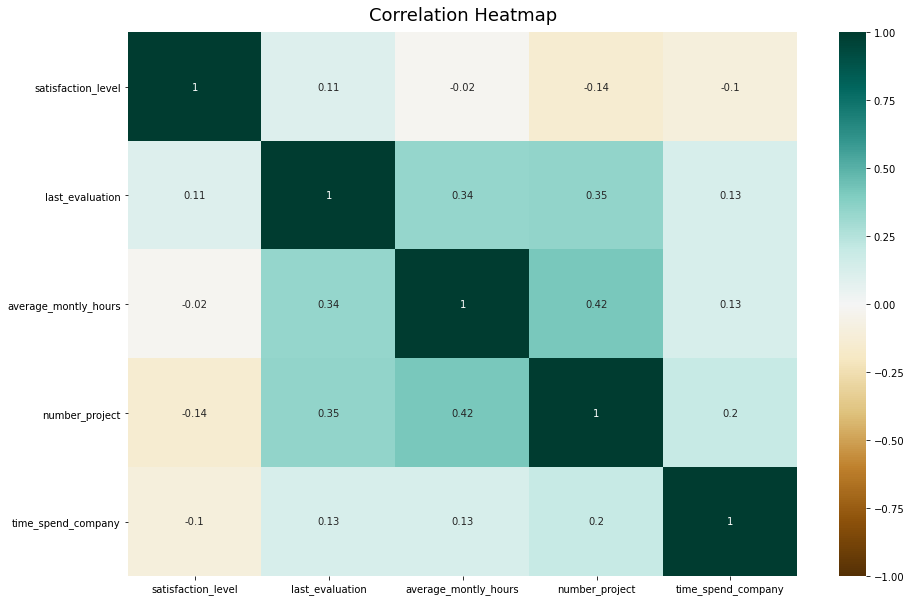

In [5]:
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

 Две самые скоррелированные переменные:
 1. `number_project` и `average_montly_hours`. Коэффициент корреляции: `0.42`
 2. `number_project` и `last_evaluation`. Коэффициент корреляции: `0.35`
 
 
 Две наименее скоррелированные переменные:
 1. `average_monthly_hours` и `satisfaction_level`. Коэффициент корреляции: `-0.02`
 2. `time_spend_company` и `satisfaction_level`. Коэффициент корреляции: `-0.1`

<a id='task4'></a>
### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [6]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<a id='task5'></a>
### Задание 5
Показать распределение сотрудников по зарплатам.

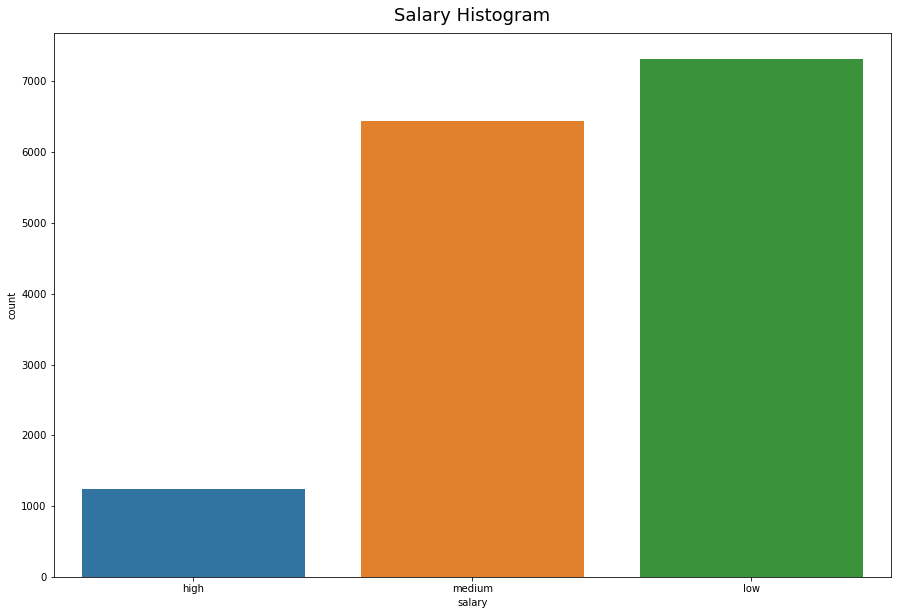

In [7]:
ax = sns.countplot(x='salary', data=hr)
ax.set_title('Salary Histogram', fontdict={'fontsize':18}, pad=12);

<a id='task6'></a>
### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

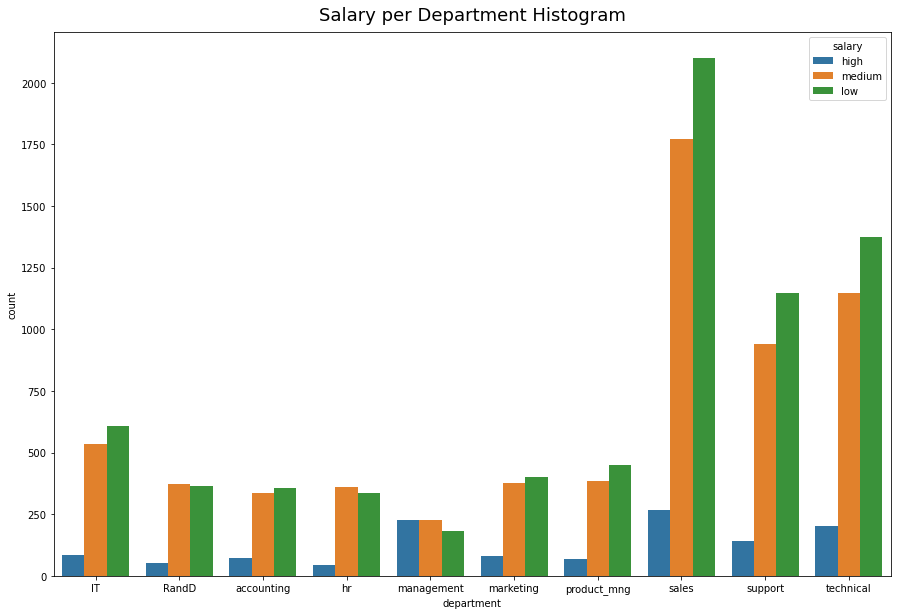

In [8]:
ax = sns.countplot(x='department', hue='salary', data=hr)
ax.set_title('Salary per Department Histogram', fontdict={'fontsize':18}, pad=12);

<a id='task7'></a>
### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Для начала проверим отличаются ли наши выборки

Гипотеза:
* H0: сотрудники с высокой и низкой зарплатой проводят одинаковое количество времени на работе
* H1: сотрудники с высокой и низкой запрлатой проводят разное количество времени на работе

Уровень значимости примем за `0.05`

In [19]:
# подготови данные
high_salary = hr['salary'] == 'high'
low_salary = hr['salary'] == 'low'

high_salary_hours = hr[high_salary]['average_montly_hours'].values
low_salary_hours = hr[low_salary]['average_montly_hours'].values

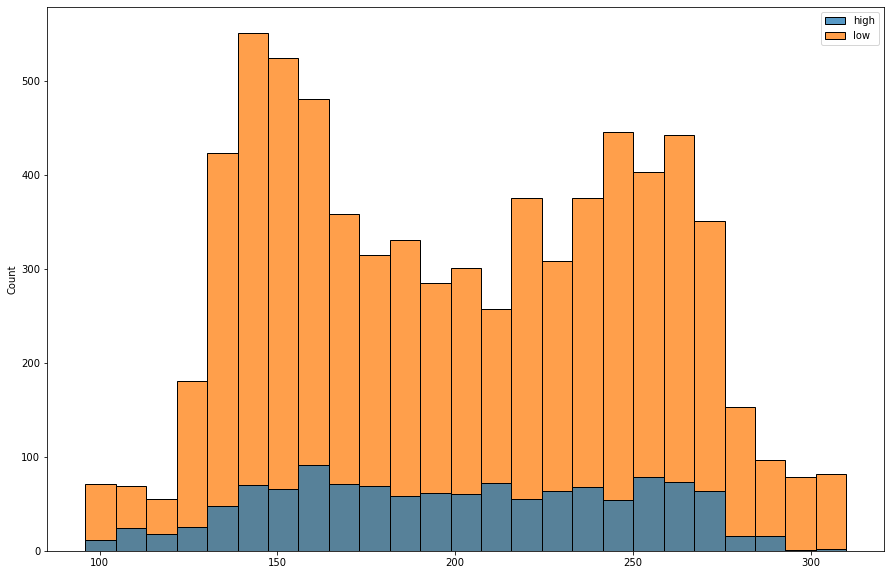

In [43]:
sns.histplot({'high': high_salary_hours, 'low': low_salary_hours});

In [63]:
# т.к. распределение не является гауссовым, будем использовать критерий Манна-Уитни
from scipy.stats import mannwhitneyu

stats, p = mannwhitneyu(high_salary_hours, low_salary_hours) # U-тест Манна-Уитни
print(stats, p)
if p < 0.05:
    print("Отвергаем H0. Сотрудники с высокой и низкой зарплатой проводят разное количество времени на работе")
else:
    print("Не отвергаем H0. Сотрудники с высокой и низкой зарплатой проводят одинаковое количество времени на работе")

4507096.5 0.4120665360429347
Не отвергаем H0. Сотрудники с высокой и низкой зарплатой проводят одинаковое количество времени на работе


<a id='task8'></a>
### Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

<a id='task9'></a>
### Задание 9
Разделить данные на тестовую и обучающую выборки.  
Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме `department` и `salary`).  
Оценить качество модели на тестовой выборки

<a id='task10'></a>
### Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку